### Problem: Unsupervised Anomaly Detection

Technique: Isolation Forest

Language: Python

Main Library: sklearn.ensemble.IsolationForest 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest

Source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html


Video Lecture on IsolationForest: https://youtu.be/RyFQXQf4w4w

IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

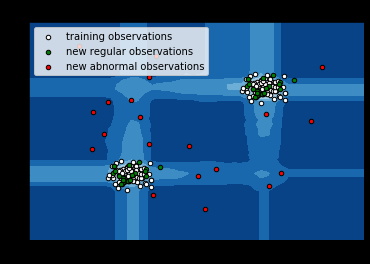

#### Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rnd = np.random.RandomState(42)

#### Generate Data

In [2]:
# Generate train data
# numpy.random.randn returns a sample (or samples) from the "standard normal" distribution.
X = 0.3 * rnd.randn(100, 2)
# numpy.r_ translates arrays (or slice objects) to concatenation along the first axis.
X_train = np.r_[X + 2, X - 2]

In [3]:
# Generate some regular novel observations
X = 0.3 * rnd.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

In [4]:
# Generate some abnormal novel observations
# numpy.random.uniform draws samples from a uniform distribution.
X_outliers = rnd.uniform(low=-4, high=4, size=(20, 2))

#### Fit the model

In [5]:
clf = IsolationForest(max_samples=100, random_state=rnd)
clf.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None, random_state=RandomState(MT19937) at 0x1AE2FDAC6A8,
                verbose=0, warm_start=False)

#### Make predictions

In [6]:
# IsolationForest.predict predicts if a particular sample is an outlier or not.
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [7]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

### Visualise

In [8]:
# plot the line, the samples, and the nearest vectors to the plane
'''
numpy.meshgrid returns coordinate matrices from coordinate vectors.
This function supports both indexing conventions through the indexing keyword argument. 
Giving the string ‘ij’ returns a meshgrid with matrix indexing, 
while ‘xy’ returns a meshgrid with Cartesian indexing. 
In the 2-D case with inputs of length M and N, the outputs are of shape (N, M) 
for ‘xy’ indexing and (M, N) for ‘ij’ indexing.
'''
# numpy.linspace returns evenly spaced numbers over a specified interval.
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
# IsolationForest.decision_function returns average anomaly score of a samples.
# numpy.ravel returns a contiguous flattened array.
# numpy.c_ translates slice objects to concatenation along the second axis
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

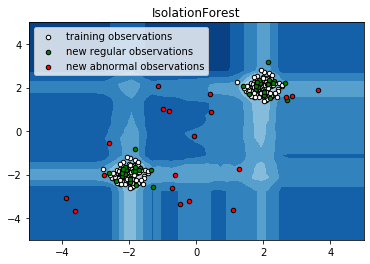

In [9]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()